In [30]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from nltk.tokenize import word_tokenize
import sys

In [31]:
sys.path.append("..")

from utilities.test_process import text_process

In [32]:
df_predictions = pd.read_csv('../results/logistic_regression_test_results.csv')

df_predictions = df_predictions.rename(columns={'pred_label': 'lr_pred_label', 'correct_prediction': 'lr_success'})

df_predictions['lr_success'] = df_predictions['lr_success'].astype(int)

df_predictions

,uid,text,extra,source,label,lr_pred_label,lr_success
0,[urlsf_subset09]-[13],media playback is unsupported on your device m...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,0,1
1,[urlsf_subset09]-[13],officials have confirmed that the toxic red sl...,"{'source': 'chatgpt', 'variant': 'original'}",chatgpt,1,1,1
2,[urlsf_subset09]-[29],jazzman said i understand you cant ban sprawl ...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,0,1
3,[urlsf_subset09]-[29],jazzman said i understand you cant ban sprawl ...,"{'variant': 'original', 'source': 'llama'}",llama,1,1,1
4,[urlsf_subset09]-[36],the egyptian parliament witnessed a new disput...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,0,1
...,...,...,...,...,...,...,...
13947,[urlsf_subset09]-[389512],a letter from the federal bureau of alcohol to...,"{'variant': 'original', 'source': 'llama'}",llama,1,0,0
13948,[urlsf_subset09]-[389538],a us army black hawk helicopter is seen photo1...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,0,1
13949,[urlsf_subset09]-[389538],a black hawk helicopter belonging to the us mi...,"{'source': 'chatgpt', 'variant': 'original'}",chatgpt,1,1,1
13950,[urlsf_subset09]-[389611],letter from an immigration official at heathro...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,0,1


In [33]:
df_svm = pd.read_csv('../results/svm_test_results.csv')
df_cnn = pd.read_csv('../results/cnn_test_results.csv')
df_bilstm = pd.read_csv('../results/bilstm_test_results.csv')
df_bert = pd.read_csv('../results/bert_test_results.csv')

In [34]:
df_svm

,uid,text,extra,source,label,pred_label,correct_prediction
0,[urlsf_subset09]-[13],media playback is unsupported on your device m...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,0,True
1,[urlsf_subset09]-[13],officials have confirmed that the toxic red sl...,"{'source': 'chatgpt', 'variant': 'original'}",chatgpt,1,1,True
2,[urlsf_subset09]-[29],jazzman said i understand you cant ban sprawl ...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,0,True
3,[urlsf_subset09]-[29],jazzman said i understand you cant ban sprawl ...,"{'variant': 'original', 'source': 'llama'}",llama,1,0,False
4,[urlsf_subset09]-[36],the egyptian parliament witnessed a new disput...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,0,True
...,...,...,...,...,...,...,...
13947,[urlsf_subset09]-[389512],a letter from the federal bureau of alcohol to...,"{'variant': 'original', 'source': 'llama'}",llama,1,1,True
13948,[urlsf_subset09]-[389538],a us army black hawk helicopter is seen photo1...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,0,True
13949,[urlsf_subset09]-[389538],a black hawk helicopter belonging to the us mi...,"{'source': 'chatgpt', 'variant': 'original'}",chatgpt,1,1,True
13950,[urlsf_subset09]-[389611],letter from an immigration official at heathro...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,0,True


In [35]:
df_svm = df_svm.rename(columns={'pred_label': 'svm_pred_label', 'correct_prediction': 'svm_success'})
df_cnn = df_cnn.rename(columns={'predictions': 'cnn_pred_label', 'correct_prediction': 'cnn_success'})
df_bilstm = df_bilstm.rename(columns={'predictions': 'bilstm_pred_label', 'correct_prediction': 'bilstm_success'})
df_bert = df_bert.rename(columns={'predicted_label': 'bert_pred_label'})

df_bert['bert_success'] = df_bert['label'] == df_bert['bert_pred_label']
df_bert['bert_success'] = df_bert['bert_success'].astype(int)

In [36]:
df_predictions = pd.concat([df_predictions, df_svm['svm_pred_label'], df_cnn['cnn_pred_label'], df_bilstm['bilstm_pred_label'], df_bert['bert_pred_label'], df_svm['svm_success'], df_cnn['cnn_success'], df_bilstm['bilstm_success'], df_bert['bert_success']], axis=1)

df_predictions

,uid,text,extra,source,label,lr_pred_label,lr_success,svm_pred_label,cnn_pred_label,bilstm_pred_label,bert_pred_label,svm_success,cnn_success,bilstm_success,bert_success
0,[urlsf_subset09]-[13],media playback is unsupported on your device m...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,0,1,0,0,0,0,True,1,1,1
1,[urlsf_subset09]-[13],officials have confirmed that the toxic red sl...,"{'source': 'chatgpt', 'variant': 'original'}",chatgpt,1,1,1,1,1,1,1,True,1,1,1
2,[urlsf_subset09]-[29],jazzman said i understand you cant ban sprawl ...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,0,1,0,0,0,0,True,1,1,1
3,[urlsf_subset09]-[29],jazzman said i understand you cant ban sprawl ...,"{'variant': 'original', 'source': 'llama'}",llama,1,1,1,0,1,1,1,False,1,1,1
4,[urlsf_subset09]-[36],the egyptian parliament witnessed a new disput...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,0,1,0,0,0,0,True,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13947,[urlsf_subset09]-[389512],a letter from the federal bureau of alcohol to...,"{'variant': 'original', 'source': 'llama'}",llama,1,0,0,1,0,1,1,True,0,1,1
13948,[urlsf_subset09]-[389538],a us army black hawk helicopter is seen photo1...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,0,1,0,0,0,0,True,1,1,1
13949,[urlsf_subset09]-[389538],a black hawk helicopter belonging to the us mi...,"{'source': 'chatgpt', 'variant': 'original'}",chatgpt,1,1,1,1,1,1,1,True,1,1,1
13950,[urlsf_subset09]-[389611],letter from an immigration official at heathro...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,0,1,0,0,0,0,True,1,1,1


In [37]:
df_predictions['cleaned_text'] = df_predictions['text'].apply(text_process)

df_predictions['tokens'] = df_predictions['cleaned_text'].apply(word_tokenize)

df_predictions['token_length'] = df_predictions['tokens'].apply(lambda x: len(x))

df_predictions

,uid,text,extra,source,label,lr_pred_label,lr_success,svm_pred_label,cnn_pred_label,bilstm_pred_label,bert_pred_label,svm_success,cnn_success,bilstm_success,bert_success,cleaned_text,tokens,token_length
0,[urlsf_subset09]-[13],media playback is unsupported on your device m...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,0,1,0,0,0,0,True,1,1,1,media playback is unsupported on your device m...,"[media, playback, is, unsupported, on, your, d...",575
1,[urlsf_subset09]-[13],officials have confirmed that the toxic red sl...,"{'source': 'chatgpt', 'variant': 'original'}",chatgpt,1,1,1,1,1,1,1,True,1,1,1,officials have confirmed that the toxic red sl...,"[officials, have, confirmed, that, the, toxic,...",98
2,[urlsf_subset09]-[29],jazzman said i understand you cant ban sprawl ...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,0,1,0,0,0,0,True,1,1,1,jazzman said i understand you cant ban sprawl ...,"[jazzman, said, i, understand, you, cant, ban,...",607
3,[urlsf_subset09]-[29],jazzman said i understand you cant ban sprawl ...,"{'variant': 'original', 'source': 'llama'}",llama,1,1,1,0,1,1,1,False,1,1,1,jazzman said i understand you cant ban sprawl ...,"[jazzman, said, i, understand, you, cant, ban,...",107
4,[urlsf_subset09]-[36],the egyptian parliament witnessed a new disput...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,0,1,0,0,0,0,True,1,1,1,the egyptian parliament witnessed a new disput...,"[the, egyptian, parliament, witnessed, a, new,...",1090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13947,[urlsf_subset09]-[389512],a letter from the federal bureau of alcohol to...,"{'variant': 'original', 'source': 'llama'}",llama,1,0,0,1,0,1,1,True,0,1,1,a letter from the federal bureau of alcohol to...,"[a, letter, from, the, federal, bureau, of, al...",434
13948,[urlsf_subset09]-[389538],a us army black hawk helicopter is seen photo1...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,0,1,0,0,0,0,True,1,1,1,a us army black hawk helicopter is seen photo1...,"[a, us, army, black, hawk, helicopter, is, see...",279
13949,[urlsf_subset09]-[389538],a black hawk helicopter belonging to the us mi...,"{'source': 'chatgpt', 'variant': 'original'}",chatgpt,1,1,1,1,1,1,1,True,1,1,1,a black hawk helicopter belonging to the us mi...,"[a, black, hawk, helicopter, belonging, to, th...",183
13950,[urlsf_subset09]-[389611],letter from an immigration official at heathro...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,0,1,0,0,0,0,True,1,1,1,letter from an immigration official at heathro...,"[letter, from, an, immigration, official, at, ...",755


/var/folders/9_/vrjvn4xx4fd31flw29nx6bpr0000gp/T/ipykernel_6638/1481494226.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for bin_range, bin_data in df_predictions.groupby('bin'):


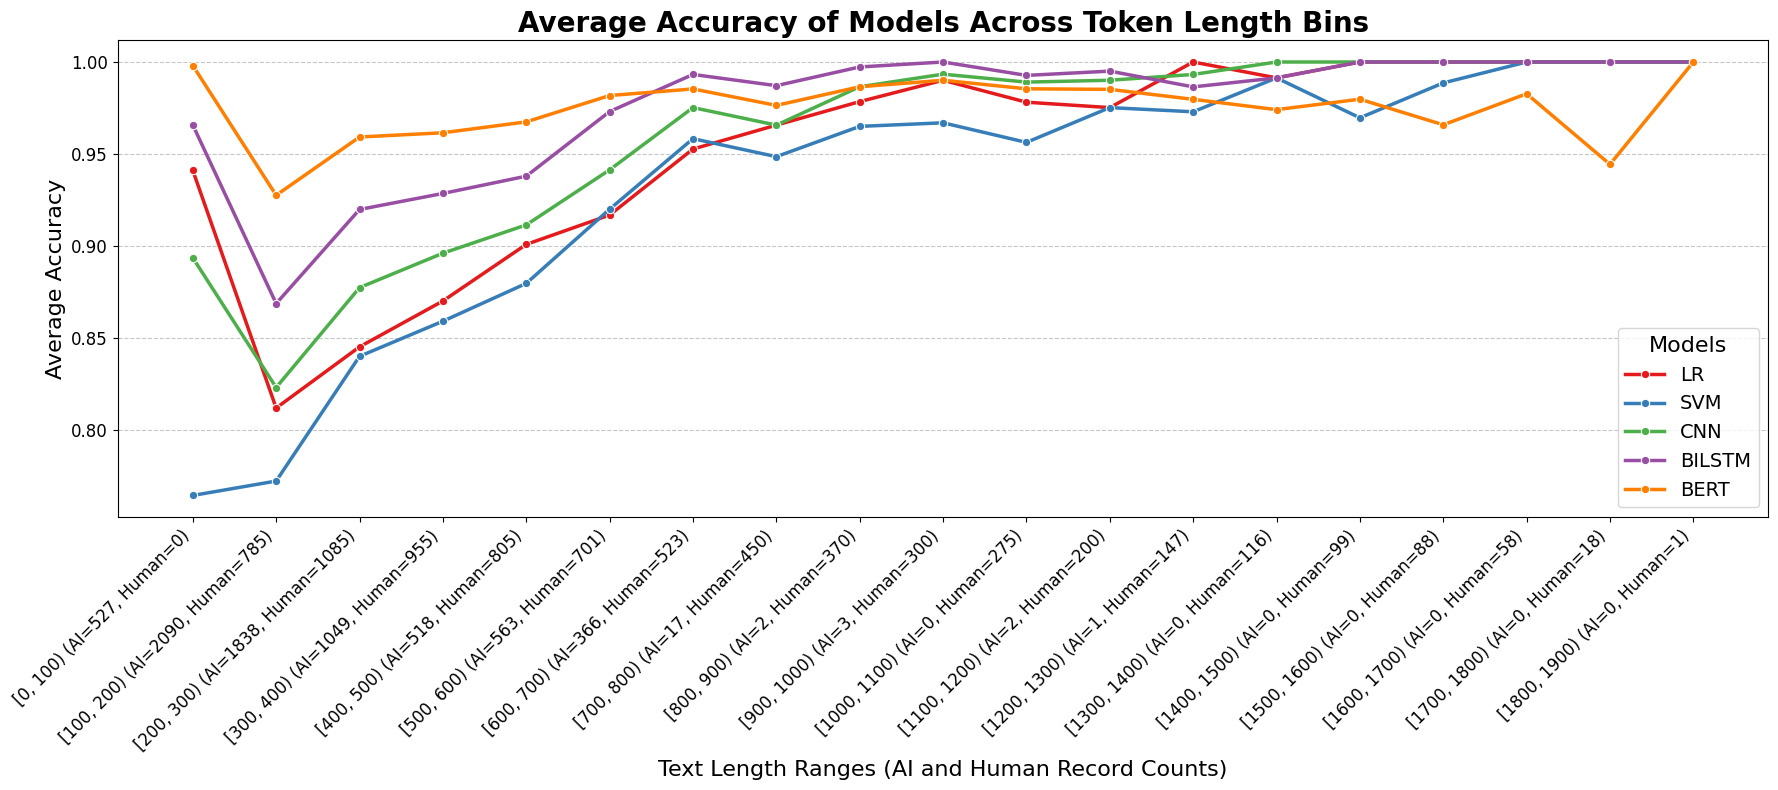

In [38]:
# Define bin size and create bins for token lengths
bin_size = 100
df_predictions['bin'] = pd.cut(
    df_predictions['token_length'],
    bins=range(0, df_predictions['token_length'].max() + bin_size, bin_size),
    right=False
)

# List of models
models = ['lr', 'svm', 'cnn', 'bilstm', 'bert']

accuracy_scores = []

# Calculate accuracy for each bin and each model
for bin_range, bin_data in df_predictions.groupby('bin'):
   
    # Bin label
    n_ai = (bin_data['label'] == 1).sum()
    n_human = (bin_data['label'] == 0).sum()
    bin_label = f"{bin_range} (AI={n_ai}, Human={n_human})"
    
    for model in models:
        # Calculate accuracy
        y_true = bin_data['label']
        y_pred = bin_data[f'{model}_pred_label']
        accuracy = accuracy_score(y_true, y_pred)

        # Store the accuracy score
        accuracy_scores.append({
            'bin': str(bin_range),
            'bin_label': bin_label,  # Add AI and Human counts to bin label
            'model': model.upper(),
            'accuracy': accuracy
        })

accuracy_df = pd.DataFrame(accuracy_scores)

# Sort bins for proper ordering
accuracy_df['bin_label'] = pd.Categorical(
    accuracy_df['bin_label'],
    categories=sorted(
        accuracy_df['bin_label'].unique(),
        key=lambda x: int(x.split(',')[0][1:])  # Sort by the numeric start of the bin range
    ),
    ordered=True
)

# Plot the accuracy scores
plt.figure(figsize=(18, 8))
sns.lineplot(data=accuracy_df, x='bin_label', y='accuracy', hue='model', marker='o', linewidth=2.5, palette='Set1')

# Add titles and labels
plt.title('Average Accuracy of Models Across Token Length Bins', fontsize=20, weight='bold')
plt.xlabel('Text Length Ranges (AI and Human Record Counts)', fontsize=16)
plt.ylabel('Average Accuracy', fontsize=16)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.legend(title='Models', fontsize=14, title_fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()

plt.show()


## Save results file

In [39]:
df_predictions.to_csv('../results/combined_test_results.csv', index=False)

In [41]:
df_only_predictions = df_predictions.drop(columns=['text', 'cleaned_text', 'token_length', 'tokens', 'bin'])

df_only_predictions.to_csv('../results/only_predictions_test_results.csv', index=False)